In [ ]:
!sudo apt-get install openjdk-7-jdk 
!sudo apt-get install python-dev
!sudo pip3 install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get update- qq
!apt-get install fonts-nanum* -qq

E: Invalid operation update-


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, '안녕')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0, flags=flags)


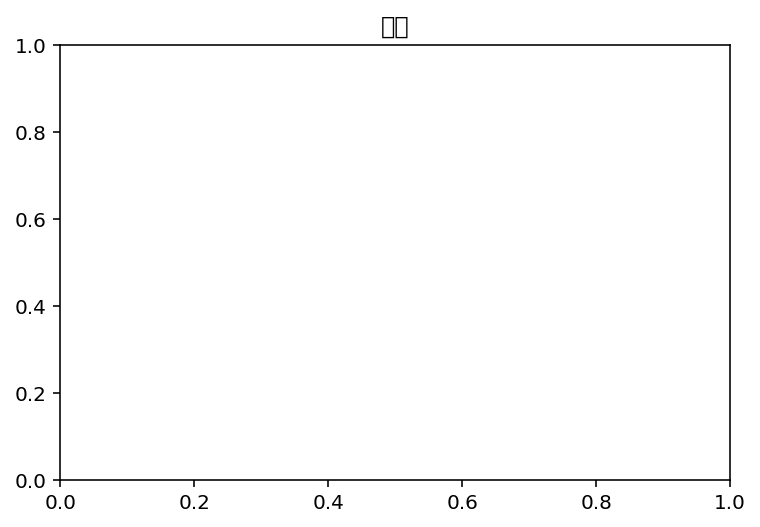

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

plt.title('안녕')

In [ ]:
import re
import os
import nltk
from konlpy.tag import Okt, Komoran, Hannanum, Kkma

In [ ]:
komoran = Komoran()
hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

In [ ]:
import os
from konlpy.tag import Okt
from collections import Counter

# Okt 형태소 분석 객체 생성
ok_twitter = Okt()

# 저장된 파일의 위치 탐색 후, file변수에 저장
file = open('/content/drive/MyDrive/dataset/text/KakaoTalk_yhj_group.txt','r',encoding='utf-8')
total_lines = file.readlines() # txt파일을 줄 단위로 읽음
file.close()
print(total_lines)

# 크롤링 댓글파일 가져와서 reply_text 리스트에 저장
reply_text = []
for line in total_lines:
  reply_text.append(line[:-1])

# 형태소 분류하고 확인 하기
sentences_tag = []
for sentence in reply_text:
  morph = ok_twitter.pos(sentence)
  sentences_tag.append(morph)

# 명사만 출력해 보기
'''
for my_sentence in sentences_tag:
	for word, tag in my_sentence:
		if tag in ['Noun']:
			print(word)
'''

# 필요한 품사만 추출해보기(명사를 bucket list에 담기)
stopwords = ['오후','오전','사진','이모티콘']
bucket_list = []
for my_sentence in sentences_tag:
    for word, tag in my_sentence:
        if tag in ['Noun'] and len(word)>1 and (word not in stopwords):
            bucket_list.append(word)
        
# 단어 빈도수 구하기
# 각 원소의 출현 횟수를 계산하는 Counter 모듈을 활용한다.
from collections import Counter
counts = Counter(bucket_list)



# 명사 빈도 순서대로 상위 30개 출력
print(counts.most_common(30))

# 명사와 형용사를 모두 추출하고 상위 50개를 출력
bucket_list_2 = []
for my_sentence in sentences_tag:
  for word, tag in my_sentence:
    if tag in ['Noun','Adjective']:
      bucket_list_2.append(word)
counts = Counter(bucket_list)
print(counts.most_common(50))

['공모전 도전팀 님과 카카오톡 대화\n', '저장한 날짜 : 2022-06-21 00:40:12\n', '\n', '--------------- 2022년 5월 27일 금요일 ---------------\n', '나건주님이 이하경님, 이하경님, 유병훈님을 초대하였습니다.\n', '나건주님이 팀채팅을 시작했어요!\n', '팀채팅방에서 주고 받은 대화와 미디어는 실시간 보관되고, 나중에 참여한 멤버도 함께 볼 수 있습니다.\n', '[나건주] [오후 11:58] 안녕하십니까\n', '[유병훈] [오후 11:59] 젊은이들 할할할 안녕\n', '[유병훈] [오후 11:59] ㅋㅋㅋㅋㅋㅋㅋ\n', '--------------- 2022년 5월 28일 토요일 ---------------\n', '[나건주] [오전 12:00] 일단 예선 통과해야 분석도 하겠네여\n', '[유병훈] [오전 12:00] 분석기간\n', '[유병훈] [오전 12:00] 1달이나주는거보면\n', '[유병훈] [오전 12:00] 어렵나본대\n', '[유병훈] [오전 12:00] ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n', '[이하경] [오전 12:01] 할\n', '[이하경] [오전 12:01] 안녕하세요\n', '[나건주] [오전 12:02] 병훈이형도 3일 방학이면\n', '[나건주] [오전 12:02] 그주 주말에 얘기좀 할까용\n', '[이하경] [오전 12:03] 좋아요!!\n', '[유병훈] [오전 12:03] 6월 4일\n', '[유병훈] [오전 12:03] 5일\n', '[유병훈] [오전 12:03] 다 괜찮긴함 현재로선\n', '[유병훈] [오전 12:03] 학회 모임끝나고\n', '[유병훈] [오전 12:03] 해도되고\n', '[나건주] [오전 12:04] 45일은 상관없음\n', '[이하경] [오전 12:04] 저도 둘다 가능합니다\n', '[이하경] [오전 12:04] 비대면일까요 대면일까요\n', '[나건주] [오전 12:04] 그것도 상관없음\n', '[유병훈] [오전 12:05] 다

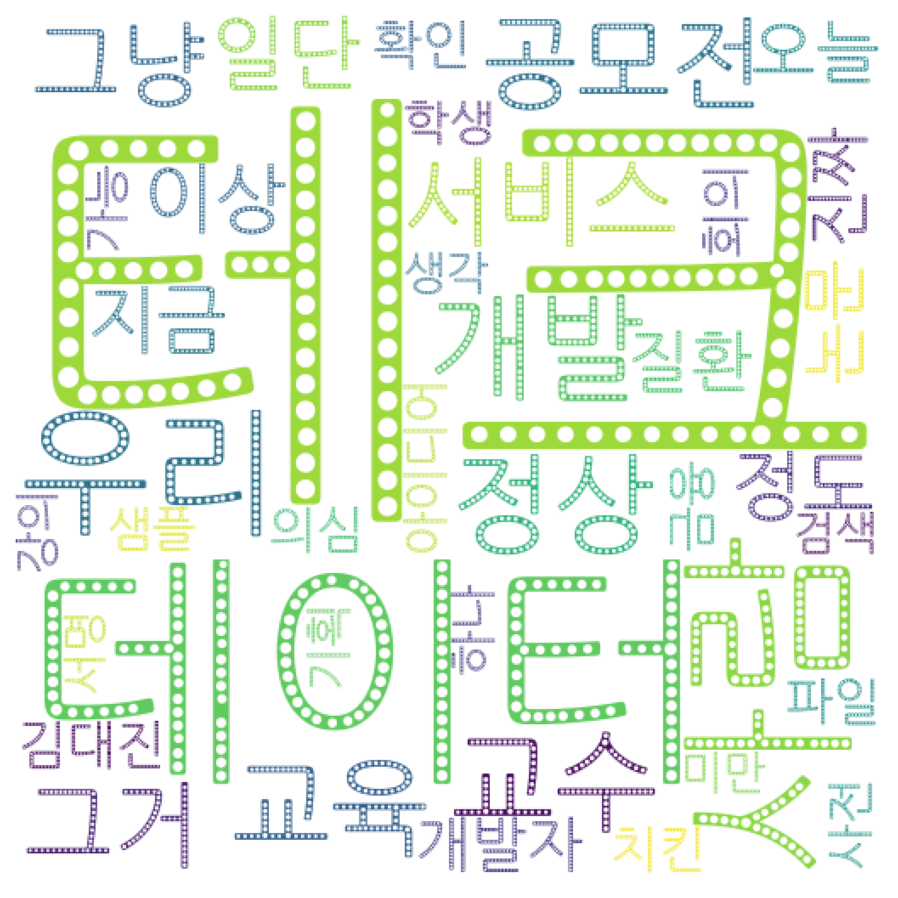

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path = path,
                    background_color = 'white',
                    width=512, height=512,
                    max_font_size=500,
                    max_words=40)
wc.generate_from_frequencies(counts)

plt.figure(figsize=(16,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Save to png
wc.to_file('/content/drive/MyDrive/dataset/text/finggle_word.jpg')


In [ ]:
!pip install stylecloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.3 MB/s 
     |████████████████████████████████| 161 kB 47.2 MB/s 
     |████████████████████████████████| 87 kB 6.6 MB/s 
     |████████████████████████████████| 87 kB 6.6 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=7ed9c36209d05db45dcc12037e1c9735db8932284682f37ea2896a27663d99ab
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=d2de33666dbcf1fc80f0bd715d45fcccf7295e1697dfdec29fdf6a9d50a2b008
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=bff2f1af490476d7b50b06dd86d4b7e89db6ce466325a8e3ab8a2f14e2af246b


In [ ]:
import stylecloud

In [ ]:
stylecloud.gen_stylecloud(text=counts,
                          icon_name="fab fa-twitter",
                          palette="colorbrewer.diverging.Spectral_11",
                          background_color='black',
                          gradient="horizontal",
                          font_path=path,
                          output_name="/content/drive/MyDrive/dataset/text/finggle_analysis.jpg")

In [ ]:
'''
- file_path: 입력할 데이터를 텍스트 문서로 지정합니다.
- text: 입력할 데이터를 딕셔너리 자료형으로 지정합니다.
- font_path: 워드클라우드를 그릴 path를 지정합니다.
- size: 사이즈를 지정, (1024, 512)과 같은 형식으로 입력합니다.
- background_color: 배경색을 지정한다. 색이름을 입력하면 된다. ( 예) white )
- icon_name: 어떤 모양으로 그릴 지 입력합니다. fab fa-twitter(트워터 모양), fas fa-dog(강아지), fas fa-flag(깃발), fas fa-fish(물고기) 등이 있다. 띄어쓰기 앞은 폰트를 의미하고, 뒤에는 모양을 의미한다. 그릴 수 있는 모양은 가지수가 좀 많은데, stylecolud패키지가 설치된 폴더에서 static폴더 밑에 fontawesome.min.css파일을 확인하면 알 수 있다.
- font_path: 폰트를 지정한다.
- output_name: 결과를 파일로 저장한다.
'''

'\n- file_path: 입력할 데이터를 텍스트 문서로 지정합니다.\n- text: 입력할 데이터를 딕셔너리 자료형으로 지정합니다.\n- font_path: 워드클라우드를 그릴 path를 지정합니다.\n- size: 사이즈를 지정, (1024, 512)과 같은 형식으로 입력합니다.\n- background_color: 배경색을 지정한다. 색이름을 입력하면 된다. ( 예) white )\n- icon_name: 어떤 모양으로 그릴 지 입력합니다. fab fa-twitter(트워터 모양), fas fa-dog(강아지), fas fa-flag(깃발), fas fa-fish(물고기) 등이 있다. 띄어쓰기 앞은 폰트를 의미하고, 뒤에는 모양을 의미한다. 그릴 수 있는 모양은 가지수가 좀 많은데, stylecolud패키지가 설치된 폴더에서 static폴더 밑에 fontawesome.min.css파일을 확인하면 알 수 있다.\n- font_path: 폰트를 지정한다.\n- output_name: 결과를 파일로 저장한다.\n'

# English Wordcloud

In [ ]:
from wordcloud import WordCloud
from nltk.tag import pos_tag
from collections import Counter
import re
#nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.

KeyboardInterrupt: ignored

In [ ]:
# 1. 텍스트 불러오기
with open('/content/drive/MyDrive/dataset/text/crypto_word.txt','r') as f:
    text = f.readlines()

In [ ]:
new = []
for i in text:
    new.append(i.replace('\n',''))
new

['Why Crypto Stocks Are Performing Worse Than Cryptocurrencies',
 'Can Elon Musk Buy All of Twitter? How Tesla’s CEO Made His Fortune',
 'How the IRS Is Cracking Down on Crypto Tax Cheats',
 'Ukraine, Russia Meet in Turkey for Cease-Fire Talks',
 'Opinion: El Salvador Bets on Bitcoin Mania',
 'Wall Street Has Been Betting Billions on Crypto. Here’s Why.',
 'El Salvador Asks: Can Bitcoin Be a Nation’s Currency?',
 'U.S. Stocks Jump as War in Ukraine Continues Fueling Big Market Moves',
 'Crypto in Wartime: Bitcoin’s Role in the Russia-Ukraine Crisis',
 'What Comes Next in El Salvador’s Bitcoin Experiment?',
 'Why Some See Web 3.0 as the Future of the Internet',
 'Volatile Trading Day Leaves U.S. Stocks Mostly Lower',
 'Turkish Investors Pivot to Cryptocurrencies as Inflation Soars, Lira Slides',
 'Opinion: Cryptocurrencies, Criminality and the State',
 'Federal Reserve Signals Rate Hike in March; U.S. Stocks Turn Lower',
 "Wall Street's Roller-Coaster Ride: What Comes Next?",
 'Opinion:

In [ ]:
words = []
for sentence in new:
    words.append(word_tokenize(sentence))

In [ ]:
words = list(itertools.chain.from_iterable(words))

In [ ]:
words = [i.lower() for i in words]
for i in words:
    i = re.sub(r'[^\.\?\!\w\d\s!@#$%^*():\',\.?`]','',i)
print(words)

['why', 'crypto', 'stocks', 'are', 'performing', 'worse', 'than', 'cryptocurrencies', 'can', 'elon', 'musk', 'buy', 'all', 'of', 'twitter', '?', 'how', 'tesla', '’', 's', 'ceo', 'made', 'his', 'fortune', 'how', 'the', 'irs', 'is', 'cracking', 'down', 'on', 'crypto', 'tax', 'cheats', 'ukraine', ',', 'russia', 'meet', 'in', 'turkey', 'for', 'cease-fire', 'talks', 'opinion', ':', 'el', 'salvador', 'bets', 'on', 'bitcoin', 'mania', 'wall', 'street', 'has', 'been', 'betting', 'billions', 'on', 'crypto', '.', 'here', '’', 's', 'why', '.', 'el', 'salvador', 'asks', ':', 'can', 'bitcoin', 'be', 'a', 'nation', '’', 's', 'currency', '?', 'u.s.', 'stocks', 'jump', 'as', 'war', 'in', 'ukraine', 'continues', 'fueling', 'big', 'market', 'moves', 'crypto', 'in', 'wartime', ':', 'bitcoin', '’', 's', 'role', 'in', 'the', 'russia-ukraine', 'crisis', 'what', 'comes', 'next', 'in', 'el', 'salvador', '’', 's', 'bitcoin', 'experiment', '?', 'why', 'some', 'see', 'web', '3.0', 'as', 'the', 'future', 'of', 't

In [ ]:
import numpy as np
import itertools

In [ ]:
taken_pos = nltk.pos_tag(words)
taken_pos

[('why', 'WRB'),
 ('crypto', 'NN'),
 ('stocks', 'NNS'),
 ('are', 'VBP'),
 ('performing', 'VBG'),
 ('worse', 'JJR'),
 ('than', 'IN'),
 ('cryptocurrencies', 'NNS'),
 ('can', 'MD'),
 ('elon', 'VB'),
 ('musk', 'JJ'),
 ('buy', 'VB'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('twitter', 'NN'),
 ('?', '.'),
 ('how', 'WRB'),
 ('tesla', 'JJ'),
 ('’', 'JJ'),
 ('s', 'NN'),
 ('ceo', 'NN'),
 ('made', 'VBD'),
 ('his', 'PRP$'),
 ('fortune', 'JJ'),
 ('how', 'WRB'),
 ('the', 'DT'),
 ('irs', 'NN'),
 ('is', 'VBZ'),
 ('cracking', 'VBG'),
 ('down', 'RP'),
 ('on', 'IN'),
 ('crypto', 'JJ'),
 ('tax', 'NN'),
 ('cheats', 'NNS'),
 ('ukraine', 'VBP'),
 (',', ','),
 ('russia', 'JJ'),
 ('meet', 'NN'),
 ('in', 'IN'),
 ('turkey', 'NN'),
 ('for', 'IN'),
 ('cease-fire', 'JJ'),
 ('talks', 'NNS'),
 ('opinion', 'NN'),
 (':', ':'),
 ('el', 'JJ'),
 ('salvador', 'NN'),
 ('bets', 'NNS'),
 ('on', 'IN'),
 ('bitcoin', 'NN'),
 ('mania', 'NN'),
 ('wall', 'NN'),
 ('street', 'NN'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('betting', 'VBG'),
 ('b

In [ ]:
NN_words = []
for words, pos in taken_pos:
    if 'NN' in pos:
        NN_words.append(words)
print(NN_words)

['crypto', 'stocks', 'cryptocurrencies', 'twitter', 's', 'ceo', 'irs', 'tax', 'cheats', 'meet', 'turkey', 'talks', 'opinion', 'salvador', 'bets', 'bitcoin', 'mania', 'wall', 'street', 'billions', 'crypto', 'el', 'salvador', 'asks', 'nation', '’', 's', 'currency', 'stocks', 'war', 'market', 'moves', 'wartime', 'bitcoin', '’', 'role', 'crisis', 'salvador', '’', 's', 'bitcoin', 'experiment', 'future', 'internet', 'trading', 'day', 'stocks', 'investors', 'cryptocurrencies', 'inflation', 'soars', 'slides', 'opinion', 'cryptocurrencies', 'criminality', 'state', 'reserve', 'signals', 'rate', 'hike', 'march', 'stocks', 'street', 'ride', 'opinion', 'cryptocurrency', 'doesn', '’', 't', 'amount', 'bitcoin', 'price', 'falls', 'tandem', 'opinion', 'congress', 'stacks', 'cash', 'worries', 'market', 'trading', 'session', 'stocks', 'trading', 'crypto', 'lending', '’', 's', 'risks', 'regulator', 'opinion', 'america', '’', 'blockchain', 'crypto', 'nfts', 'money', 'holiday', 'season', 'bitcoin', 'holiday

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)
print(lemmatized_words)

['crypto', 'stock', 'cryptocurrencies', 'twitter', 's', 'ceo', 'irs', 'tax', 'cheat', 'meet', 'turkey', 'talk', 'opinion', 'salvador', 'bet', 'bitcoin', 'mania', 'wall', 'street', 'billion', 'crypto', 'el', 'salvador', 'asks', 'nation', '’', 's', 'currency', 'stock', 'war', 'market', 'move', 'wartime', 'bitcoin', '’', 'role', 'crisis', 'salvador', '’', 's', 'bitcoin', 'experiment', 'future', 'internet', 'trading', 'day', 'stock', 'investor', 'cryptocurrencies', 'inflation', 'soar', 'slide', 'opinion', 'cryptocurrencies', 'criminality', 'state', 'reserve', 'signal', 'rate', 'hike', 'march', 'stock', 'street', 'ride', 'opinion', 'cryptocurrency', 'doesn', '’', 't', 'amount', 'bitcoin', 'price', 'fall', 'tandem', 'opinion', 'congress', 'stack', 'cash', 'worry', 'market', 'trading', 'session', 'stock', 'trading', 'crypto', 'lending', '’', 's', 'risk', 'regulator', 'opinion', 'america', '’', 'blockchain', 'crypto', 'nfts', 'money', 'holiday', 'season', 'bitcoin', 'holiday', 'gift', 'stock',

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords_list = stopwords.words('english')
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

In [ ]:
#customized_stopwords = ['bitcoin', 'opinion', 'morning', "’", "download", 'market','price','currency','etf','china', 'exchange','investor','report','salvador','‘','cryptocurrencies','%'] # 직접 만든 불용어 사전
customized_stopwords = ['opinion','cryptocurrency','morning', "’", "download", 'market','price','currency','etf','china', 'exchange','investor','report','salvador','‘','cryptocurrencies','%']
unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

print(final_NN_words)

['crypto', 'stock', 'twitter', 'ceo', 'irs', 'tax', 'cheat', 'meet', 'turkey', 'talk', 'bet', 'bitcoin', 'mania', 'wall', 'street', 'billion', 'crypto', 'el', 'asks', 'nation', 'stock', 'war', 'move', 'wartime', 'bitcoin', 'role', 'crisis', 'bitcoin', 'experiment', 'future', 'internet', 'trading', 'day', 'stock', 'inflation', 'soar', 'slide', 'criminality', 'state', 'reserve', 'signal', 'rate', 'hike', 'march', 'stock', 'street', 'ride', 'amount', 'bitcoin', 'fall', 'tandem', 'congress', 'stack', 'cash', 'worry', 'trading', 'session', 'stock', 'trading', 'crypto', 'lending', 'risk', 'regulator', 'america', 'blockchain', 'crypto', 'nfts', 'money', 'holiday', 'season', 'bitcoin', 'holiday', 'gift', 'stock', 'deposit', 'insurance', 'fed', 'bitcoin', 'creator', 'jury', 'crypto', 'tether', 'board', 'pressure', 'stock', 'growth', 'data', 'coinbase', 'ceo', 'approach', 'regulation', 'cardano', 'ada', 'energy', 'stock', 'reopening', 'dow', 'p', 'edge', 'payment', 'deadline', 'emotion', 'judgem

In [ ]:
from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
print(c)
k = 5
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'bitcoin': 156, 'crypto': 21, 'stock': 21, 'future': 21, 'risk': 17, 'blockchain': 16, 'tax': 8, 'week': 8, 'time': 8, 'bank': 8, 'street': 7, 'trading': 7, 'cash': 7, 'regulator': 7, 'rally': 7, 'fund': 7, 'year': 7, 'plan': 6, 'volatility': 6, 'trader': 6, 'sec': 6, 'startup': 6, 'gold': 6, 'company': 6, 'ceo': 5, 'fall': 5, 'money': 5, 'coinbase': 5, 'regulation': 5, 'rise': 5, 'month': 5, 'hacker': 5, 'hack': 5, 'offering': 5, 'corruption': 5, 'buyer': 5, 'coin': 5, 'day': 4, 'fed': 4, 'energy': 4, 'scam': 4, 'people': 4, 'power': 4, 'boom': 4, 'push': 4, 'investment': 4, 'economics': 4, 'world': 4, 'thing': 4, 'current': 4, 'crackdown': 4, 'plunge': 4, 'talk': 3, 'mania': 3, 'wall': 3, 'move': 3, 'role': 3, 'experiment': 3, 'rate': 3, 'ride': 3, 'holiday': 3, 'board': 3, 'payment': 3, 'mining': 3, 'record': 3, 'law': 3, 'rule': 3, 'venture': 3, 'firm': 3, 'deal': 3, 'mt': 3, 'million': 3, 'contract': 3, 'change': 3, 'manager': 3, 'man': 3, 'hedge': 3, 'giant': 3, 'trade':

In [ ]:
import pandas as pd

In [ ]:
df_c = pd.DataFrame(list(c.items()),columns=['keywords','freq'])
df_c = df_c.sort_values('freq', ascending=False).head(20).reset_index(drop=True)
df_c

,keywords,freq
0,bitcoin,156
1,crypto,21
2,stock,21
3,future,21
4,risk,17
5,blockchain,16
6,bank,8
7,tax,8
8,week,8
9,time,8


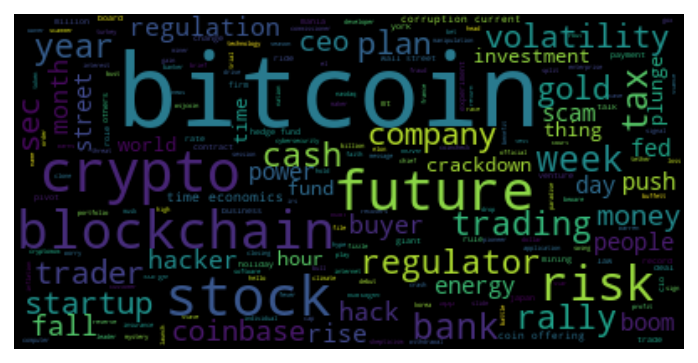

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

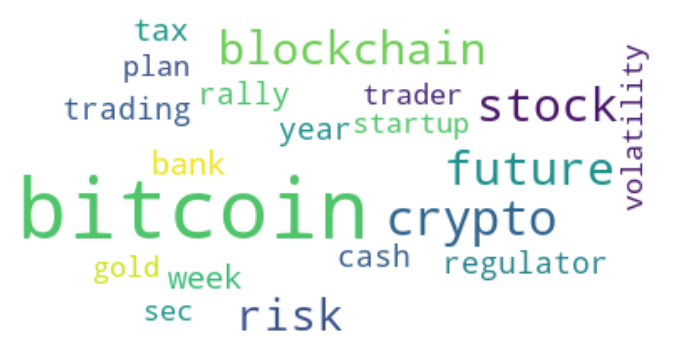

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color='white', relative_scaling=.5).generate(noun_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()